# Promotion Analysis to Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>

## Contents

1. [Information of background to Project](#1)
2. [Installation: Loading Libraries](#2)
3. [Loading and Inspection of Data](#3)
4. [Calculating of IRR and NIR](#4) 
5. [Hypothesis Testing Group of Control and Experiment](#5)
6. [Hypothesis Testing for NIR and IRR Value](#6)
7. [Hypothesis Testing for IRR Value](#7)
8. [Model Creation](#8)

---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8901;&#8913;</span><em></em></p>

<a id="1"></a>
## 1. Background Information

The dataset we will be dealing in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### QUESTIONS
1. Calculate Net Incremental Revenue (NIR), Incremental Response Rate (IRR) values and their statistical significance. [Answer](#Q1)
2. Our task is to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, try to maximize the following metrics: [Answer](#Q2)
    - Net Incremental Revenue (NIR)
    - Incremental Response Rate (IRR)
3. If data has  imbalanced problem, fix this issue and show results.[Answer](#Q3)


* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{  purch _ { treat } }{ cust _ { treat } } - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8901;&#8913;</span><em></em></p>

<a id="2"></a>
### 2. Loading of Libraries

In [1]:
# load in packages
from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8901;&#8913;</span><em></em></p>

<a id="3"></a>
### 3. Loading and Inspection of Data

####  3.1 Loading of Data 

In [2]:
# load in the data
train_data = pd.read_csv('./training.csv')
train_data.sample(10)

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
38594,57363,Yes,0,2,30.676251,-1.165083,2,2,1,2
74117,110617,Yes,0,0,32.386559,-1.597972,2,1,3,1
11258,16802,Yes,0,2,36.366901,0.047006,2,3,3,2
33554,49903,Yes,0,1,34.568696,-0.645617,1,3,2,2
35328,52565,No,0,2,28.121213,-0.991928,1,3,1,2
11522,17183,Yes,0,1,29.756158,-1.078506,2,2,1,1
37729,56112,Yes,0,3,32.812321,0.826206,2,2,4,1
79081,118032,Yes,0,1,34.071632,-1.338239,2,3,1,1
76845,114707,Yes,0,2,26.049563,0.220161,1,3,3,2
36653,54549,Yes,0,1,22.947213,-0.299306,2,3,1,1


#### 3.2 Inspection of Data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84534 entries, 0 to 84533
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         84534 non-null  int64  
 1   Promotion  84534 non-null  object 
 2   purchase   84534 non-null  int64  
 3   V1         84534 non-null  int64  
 4   V2         84534 non-null  float64
 5   V3         84534 non-null  float64
 6   V4         84534 non-null  int64  
 7   V5         84534 non-null  int64  
 8   V6         84534 non-null  int64  
 9   V7         84534 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 6.4+ MB


In [4]:
# The number of records and columns
total_record = train_data.shape[0]
column_count = train_data.shape[1]
print('In this data set, it has {} total records and {} columns'.format(total_record,column_count))

In this data set, it has 84534 total records and 10 columns


#### 3.3 Counting some of something

,Promotion
Promotion,
No,42170
Yes,42364


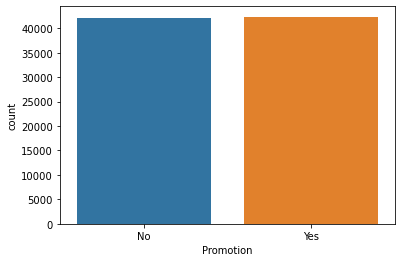

In [5]:
# Distribution of 'Promotion'
#train_data.groupby(by='Promotion')[['Promotion']].count()


# Amount of individuals who are and not sent promotion
display(train_data.groupby(by='Promotion')[['Promotion']].count())
sns.countplot(train_data['Promotion']);

,purchase
purchase,
0,83494
1,1040


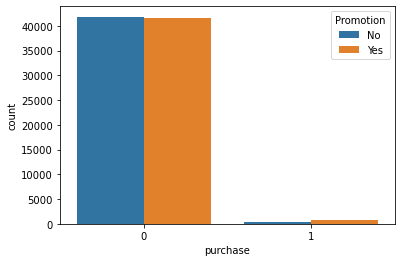

In [6]:
# Distribution of 'Promotion'

display(train_data.groupby(by='purchase')[['purchase']].count())
sns.countplot('purchase', data = train_data, hue = 'Promotion');

purchase
Promotion purchase          
No        0            41851
          1              319
Yes       0            41643
          1              721

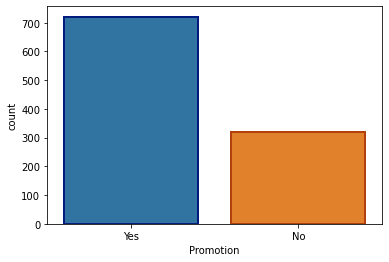

In [7]:
# Distribution of 'Promotion' by 'purchase' 

# Amount of individuals who made a purchase with Promotion column as hue
purc_data = train_data[train_data.purchase==1]
display(train_data.groupby(by=['Promotion','purchase'])[['purchase']].count())
sns.countplot(purc_data['Promotion']
              ,linewidth=2,edgecolor=sns.color_palette("dark", 3));


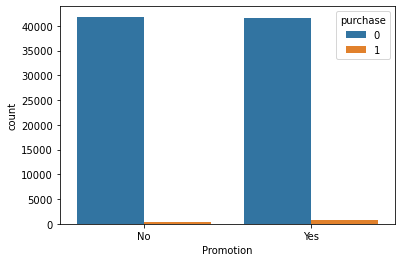

In [8]:
sns.countplot('Promotion', data = train_data, hue = 'purchase');

---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8901;&#8913;</span><em></em></p>

<a id="Q1"></a>
## Solution to Question 1
<a id="4"></a>
### 4. Calculating of IRR and NIR

In [9]:
# Calculating of IRR and NIR
purc_ctrl = train_data.groupby('Promotion')['purchase'].sum()[0]
purc_treat = train_data.groupby('Promotion')['purchase'].sum()[1]
cust_treat = train_data['Promotion'].value_counts()[0]
cust_ctrl = train_data['Promotion'].value_counts()[1]

# Value of IRR
IRR_value = (purc_treat / cust_treat) - (purc_ctrl / cust_ctrl)

# Value of NIR
NIR_value = ((10 * purc_treat) - (0.15 * cust_treat)) - 10 * purc_ctrl

# Display of value of IRR and NIR
pd.DataFrame(np.array([['IRR value', round(IRR_value,5)], ['NIR value', round(NIR_value,5)]]),
                   columns=['Name', 'Value']).set_index('Name')

,Value
Name,
IRR value,0.00945
NIR value,-2334.6


---
&#8912;&#8901;&#8901;&#8901;&#8901;&#8913;
<br>
<a id="5"></a>
### 5. Hypothesis Testing Group of Control and Experiment
Analysis of number of participants in our **`Control`** and **`Experiment`**.

Hypothesis:
$$H_{0}: E_{participants} = C_{participants}$$
$$H_{a}: E_{participants} ≠ C_{participants}$$
<br>
$$\alpha = 0.05$$

####  5.1 Preparation for the evaluation of the hypothesis.

In [10]:
# Checking the number of individuals in each group
print("The number who received the promotion: {} and the number who did not: {}.".format(
    (train_data.Promotion == "Yes").sum(),(train_data.Promotion == "No").sum()))


The number who received the promotion: 42364 and the number who did not: 42170.


In [12]:
# Calculating a measurable statistic in the difference of our group sizes
promotion_avg = ((train_data.Promotion == "Yes").sum())/train_data.shape[0]
non_promotion_avg = (train_data.Promotion == "No").sum()/train_data.shape[0]
sample_difference = promotion_avg - non_promotion_avg

print('Average of Promotion     :',promotion_avg)
print('Average of Non Promotion :',non_promotion_avg)
print('Sample of Difference     :',sample_difference)

In [14]:
# Determination of "sub sample" the size for Bootstraping
sss = int(round(train_data.shape[0] * 0.2,0))  # Sub Sample Size
sss

16907

In [15]:
# Bootstraping our differences to get a model of the distribution for our null
prom_avg = []
non_prom_avg = []
differences = []

for _ in range(10000):
    
    sub_sample = train_data.sample(sss, replace=True)
    promotion_avg = ((sub_sample.Promotion == "Yes").sum())/sub_sample.shape[0]
    non_promotion_avg = (sub_sample.Promotion == "No").sum()/sub_sample.shape[0]
    
    prom_avg.append(promotion_avg)
    non_prom_avg.append(non_promotion_avg)
    differences.append(promotion_avg - non_promotion_avg)

####  5.2 Visualization of Computed Sample  Distribution

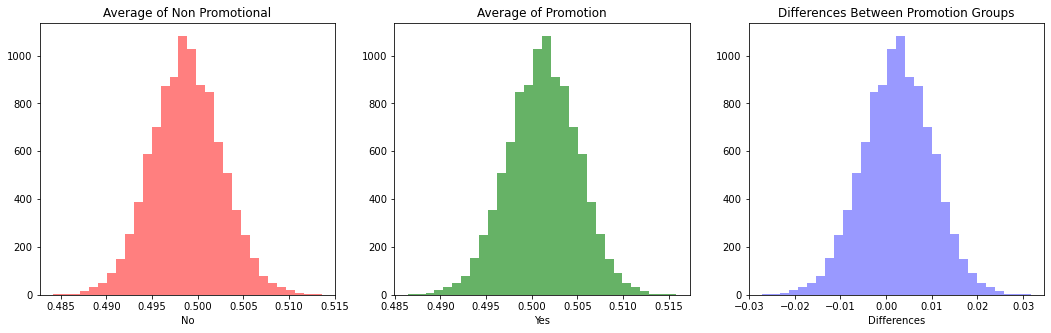

In [16]:
# visualization of our distribution 

fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(18,5))

ax[0].hist(non_prom_avg, bins=30,facecolor='red', alpha=0.5)
ax[0].set_title('Average of Non Promotional')
ax[0].set_xlabel('No')

ax[1].hist(prom_avg, bins=30, facecolor='green', alpha=0.6)
ax[1].set_title('Average of Promotion')
ax[1].set_xlabel('Yes')

ax[2].hist(differences, bins=30, facecolor='blue', alpha=0.4)
ax[2].set_title('Differences Between Promotion Groups')
ax[2].set_xlabel('Differences')

plt.show()

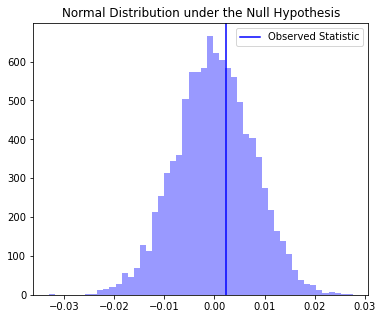

In [17]:
# distribution of our null hypothesis
fig = plt.subplots(nrows=1,ncols=1, figsize=(6,5))
null_vals = np.random.normal(0, np.std(differences), 10000)
plt.hist(null_vals, bins=50, facecolor='blue', alpha=0.4)
plt.axvline(sample_difference, color='b', label ="Observed Statistic")
plt.legend(loc='upper right')
plt.title("Normal Distribution under the Null Hypothesis");

#### 5.3 Evolation of P value

In [18]:
# Determining the signifigance of our result 
p_val = (sample_difference>null_vals).mean()
p_val

0.6176

#### 5.4 Conclusion of Hypothesis

Computed **`P value`** (` p_val=0.6176 > ⍺=0.05 `)is well within our confidence interval and therefore **we fail to reject the H0-null hypothesis**. This implies that there is no statistical signifigance in the difference of our sampling populations. **It's not surprising.** Obviously, we did not find any different results from what we saw when we first began to study the data.

---
&#8912;&#8901;&#8901;&#8901;&#8901;&#8913;
<br>
<a id="Q2"></a>
## Solution to Question 2
<a id="6"></a>
### 6. Hypothesis Testing for NIR Value
Analysis of statisticaly of **`N I R`** value. Below, it determine if the experiment had a positive effect on the `N I R` metric.
<br>
Hypothesis:
$$H_{0}:Net Incremental Revenue = 0$$
$$H_{a}:Net Incremental Revenue > 0$$
$$\alpha = 0.05$$
Our *Alpha value* with the Bonferroni Correction:
$$Bonferroni Correction = \frac{\alpha}{number-of-measures} = 0.025$$

Where: 

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

#### 6.1 Preparation for the evaluation of the hypothesis.

In [19]:
# Finding our observed statistic 
purchase_treatment = train_data[train_data['Promotion'] == "Yes"].purchase.sum()
customer_treatment = train_data[train_data['Promotion'] == "Yes"].shape[0]
purchase_control = train_data[train_data['Promotion'] == "No"].purchase.sum()
NIR = ((10 * purchase_treatment) - (0.15 * customer_treatment)) - (10 * purchase_control)
NIR

-2334.5999999999995

In [20]:
# Bootstraping our differences to get a model of the distribution for our null
NIRs = []
for _ in range(10000):
    sub_sample = train_data.sample(sss, replace=True)
    purchase_treatment = sub_sample[sub_sample['Promotion'] == "Yes"].purchase.sum()
    customer_treatment = sub_sample[sub_sample['Promotion'] == "Yes"].shape[0]
    purchase_control = sub_sample[sub_sample['Promotion'] == "No"].purchase.sum()
    NIRs.append(((10 * purchase_treatment) - (0.15 * customer_treatment)) - (10 * purchase_control))

####  6.2 Visualization of Computed NIR value

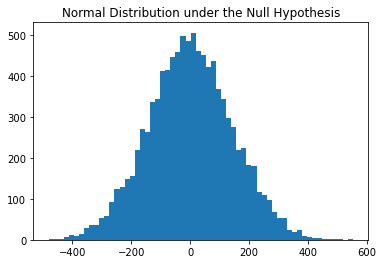

In [21]:
# distribution of our null hypothesis
null_NIRs = np.random.normal(0, np.std(NIRs), 10000)
plt.hist(null_NIRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis");

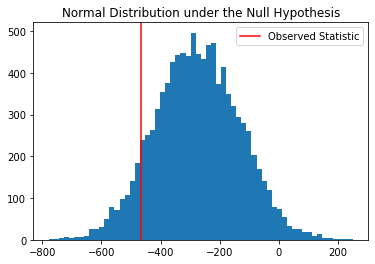

In [22]:
# Plotting under the null
abc = sss/train_data.shape[0]
plt.axvline(NIR * abc, color='r', label ="Observed Statistic")
null_NIRs = np.random.normal(sum(NIRs)/sss, np.std(NIRs), 10000)
plt.hist(null_NIRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis")
plt.legend();

##### 6.3 Evolation of P value

In [23]:
# Checking the signifigane is 0
p_val_NIR = (NIR * abc > null_NIRs).mean()
p_val_NIR

0.0889

In [24]:
# Curious check to ensure all the data under the null lies above our observed statistic
p_val2_NIR = (NIR * abc <null_NIRs).mean()
p_val2_NIR

0.9111

In [25]:
# Curious check to ensure all the data under the null lies above our observed statistic
p_val3_NIR = ((NIR / train_data.shape[0]) > (null_NIRs / sss)).mean()
p_val3_NIR

0.0889

In [26]:
np.std(NIRs)

143.13100045392255

In [27]:
print((NIR/train_data.shape[0]))
print(null_NIRs[:10]/sss)

-0.02761729008446305
[-0.01111225 -0.01339984 -0.01569449 -0.00675264 -0.01065468  0.00138447
 -0.00522658 -0.00963203 -0.01436512 -0.01370165]


#### 6.4 Conclusion of Hypothesis
Our **`P value`** (` p_val_NIR=0.0952 > ⍺=0.05 `) is well below our confidence interval and therefore we **fail to reject our null hypothesis**. This implies that there is no statistical signifigant increase in NIR (what we want to optimise). However, our data indicates we signifigantly REDUCED the NIR with this campaign. Not what we want...


---
&#8912;&#8901;&#8901;&#8901;&#8901;&#8913;
<br>
<a id="7"></a>
### 7. Hypothesis Testing for IRR Value
Analysis of statisticaly of **`I I R`** values. Below, it shall determine if the experiment had a positive effect on the `I I R` metric. 
Hypothesis:
$$H_{0}:Incremental Response Rate = 0$$
$$H_{a}:Incremental Response Rate > 0$$
$$\alpha = 0.025$$

Where:
$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$

#### 7.1 Preparation for the evaluation of the hypothesis.

In [28]:
# Finding our observed statistic 
purchase_treatment = train_data[train_data['Promotion'] == "Yes"].purchase.sum()
customer_treatment = train_data[train_data['Promotion'] == "Yes"].shape[0]
purchase_control = train_data[train_data['Promotion'] == "No"].purchase.sum()
customer_control = train_data[train_data['Promotion'] == "No"].shape[0]
IRR = purchase_treatment/customer_treatment - purchase_control/customer_control
IRR

0.009454547819772702

In [29]:
# Bootstraping our differences to get a model of the distribution for our null
sub_sample_size = 5000
IRRs = []
for _ in range(10000):
    bootsample2 = train_data.sample(sub_sample_size, replace=True)
    purchase_treatment = bootsample2[bootsample2['Promotion'] == "Yes"].purchase.sum()
    customer_treatment = bootsample2[bootsample2['Promotion'] == "Yes"].shape[0]
    purchase_control = bootsample2[bootsample2['Promotion'] == "No"].purchase.sum()
    customer_control = bootsample2[bootsample2['Promotion'] == "No"].shape[0]
    IRR_boot = purchase_treatment/customer_treatment - purchase_control/customer_control
    IRRs.append(IRR_boot)

##### 7.2 Visualization of Computed IRR value

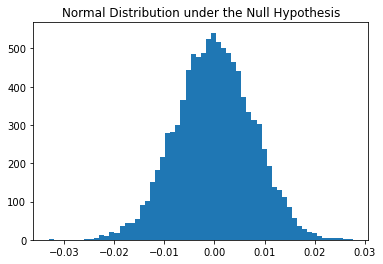

In [30]:
# distribution of our null hypothesis
null_IRRs = np.random.normal(sum(IRRs)/sub_sample_size, np.std(IRRs), 10000)
plt.hist(null_vals, bins=60)
plt.title("Normal Distribution under the Null Hypothesis");

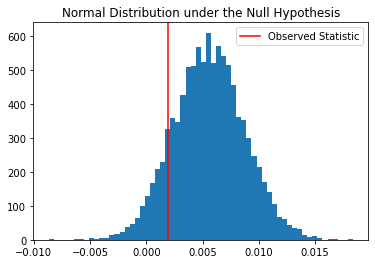

In [31]:
# Reviewing our observed statistic against the bootstrapped sample
plt.axvline((IRR * abc ), color='r', label ="Observed Statistic")
null_IRRs = np.random.normal(sum(IRRs)/sss, np.std(IRRs), 10000)
plt.hist(null_IRRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis")
plt.legend();

##### 7.3 Evolation of P value

In [32]:
# Calculating the signifigance of this result 
p_val_IRR = (IRR > null_IRRs).mean()
p_val_IRR

0.8905

In [33]:
np.std(IRRs)

0.0031043029076664487

##### 7.4 Conclusion of Hypothesis

Our **`P value`** (` p_val_IIR=0.8962 > ⍺=0.05 `)is well above our null distribution and therefore **we reject the H0-null hypothesis.** This implies that there is a statistical increase in IRR between our control and experiemental group. So, we can see that our campaign does have a positive affect on the number of customers who purchased the product with the promotion, as compared to if they didn't receive the promotion.

---
&#8912;&#8901;&#8901;&#8901;&#8901;&#8901;&#8901;&#8901;&#8913;
<br>
<a id="7"></a>
### 7. Model Creation

Here we shall a model that can accuractely predict if a customer will be responsive to the campaign.

#### 7.1 Preparation for Model

In [34]:
# Reviewing the number of individuals who purchased products in both the control and experiment condition 
train_data.groupby('Promotion').purchase.sum()

Promotion
No     319
Yes    721
Name: purchase, dtype: int64

In [36]:
# Loading in our test data 
test_data = pd.read_csv('test.csv')

# Tailoring the test data to test our model 
data_exp_test = test_data.copy()
data_exp_test = data_exp_test[data_exp_test['Promotion']=="Yes"]
data_exp_test.drop(['ID','Promotion'], axis = 1, inplace=True)
#X_test = data_exp_test.drop(['purchase'],axis=1)
#y_test = data_exp_test.purchase.values



# Copying the dataframe over 
data_exp = train_data.copy()
# only considering the experiment group for our model training 
data_exp = data_exp[data_exp['Promotion']=="Yes"]
# Dropping the irrelavant columns 
data_exp.drop(['ID','Promotion'], axis = 1, inplace=True)


df = pd.concat([data_exp,data_exp_test])
df.head()

,purchase,V1,V2,V3,V4,V5,V6,V7
4,0,3,28.044332,-0.385883,1,1,2,2
8,0,2,31.930423,0.393317,2,3,1,2
10,0,1,32.770916,-1.511395,2,1,4,1
12,0,1,36.957009,0.133583,2,3,1,1
14,0,3,36.911714,-0.905350,2,2,4,1


In [37]:
# Splitting our data into predictors and target variables
X = df.drop(['purchase'],axis=1)
y = df.purchase

#### 8.2 Scaling of  Features

In [38]:
# Scaling our inputs 
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

#### 8.3 Splitting of Data

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 8.4 Fitting of Data

In [40]:
# Instantiating our model and fitting it
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 8.5 Prediction, Accuruty and Confution Matrix

In [41]:
# Predicting our target values
y_pred = clf.predict(X_test)

In [42]:
# Checking our accuracy for the model 
accuracy = (y_pred == y_test).mean()
print("Our accuracy for the random forest model was {0:.5f}%".format(accuracy))

Our accuracy for the random forest model was 0.98127%


In [43]:
#test_data.groupby('Promotion','purchase')

100-data_exp_test.purchase.value_counts()[1]/data_exp_test.shape[0]

99.98366107576634

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20461
           1       0.00      0.00      0.00       366

    accuracy                           0.98     20827
   macro avg       0.49      0.50      0.50     20827
weighted avg       0.97      0.98      0.97     20827

0.9812743073894464


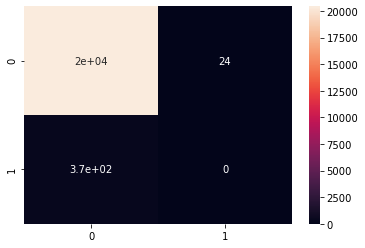

In [44]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)
print(ac)
sns.heatmap(cm, annot=True);


#### 8.6 Converting to YES-NO

In [45]:
# Converting our numeric outputs to Yes/No's 
promotion_yes_no = []
for value in y_pred:
    if value == 0:
        promotion_yes_no.append("No")
    if value == 1:
        promotion_yes_no.append("Yes")
    

In [46]:
# Converting to a NumPy Array 
np.asarray(promotion_yes_no)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

#### 8.7 Testing Promotion Strategy

In [47]:
# Creating the function to pass to our test_results function
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    df = min_max_scaler.fit_transform(df)
    
    y_pred = clf.predict(df)
    
    promotion_yes_no = []
    for value in y_pred:
        if value == 0:
            promotion_yes_no.append("No")
        if value == 1:
            promotion_yes_no.append("Yes")
            
    promotion = np.asarray(promotion_yes_no)
        
    return promotion

In [48]:
# This will test our results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0667.

Your nir with this strategy is 7.75.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.06666666666666667, 7.75)

#### Model Conclusion

Ha! So, we managed to get a better IRR but a signifigantly worse nir than the experts over at Udacity... Regardless, we still managed a signifigantly better approach than what we had observed with the experiment. 

Our confusion matrix indidcated that our accuracy is only hindered by a small number of false negatives. Prehaps if we had a less conservative model we may see a **higher NIR** rate. Allowing for a higher number of false positives may actually improve our NIR metric at the cost of our IRR. 

So to recap, 
- We trained our model on only those individuals in the experiment (i.e. they were offered the promotion)
- Our model would than predict whether or not the individuals would purchase from the promotion offer based on the predicitor variables
- We than tested our models NIR and IRR metrics using a local python script.



<a id="Q3"></a>
## Solution to Question 3

##### 8.7 Solution to  Imbalance Problem

In [49]:
from imblearn.ensemble import BalancedRandomForestClassifier

BRFC = BalancedRandomForestClassifier(max_depth=2, random_state=0)
BRFC.fit(X_train, y_train)
print(BRFC.feature_importances_)
#print(BRFC.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

[0.02148776 0.14493856 0.14121021 0.46268247 0.17439242 0.04065171
 0.01463687]


In [50]:
y_pred_BRFC = BRFC.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.36      0.53     20461
           1       0.02      0.83      0.04       366

    accuracy                           0.37     20827
   macro avg       0.51      0.59      0.29     20827
weighted avg       0.97      0.37      0.52     20827

0.3728813559322034


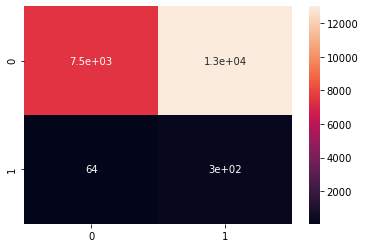

In [51]:
cm_BRFC = confusion_matrix(y_test, y_pred_BRFC)
ac_BRFC = accuracy_score(y_test, y_pred_BRFC)
cr_BRFC = classification_report(y_test, y_pred_BRFC)
print(cr_BRFC)
print(ac_BRFC)
sns.heatmap(cm_BRFC, annot=True);

In [52]:
cm_BRFC

array([[ 7464, 12997],
       [   64,   302]], dtype=int64)

In [53]:
cm

array([[20437,    24],
       [  366,     0]], dtype=int64)

In [54]:
# Creating the function to pass to our test_results function
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    df = min_max_scaler.fit_transform(df)
    
    y_pred = BRFC.predict(df)
    
    promotion_yes_no = []
    for value in y_pred:
        if value == 0:
            promotion_yes_no.append("No")
        if value == 1:
            promotion_yes_no.append("Yes")
            
    promotion = np.asarray(promotion_yes_no)
    
    
    
    
    return promotion

In [55]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0156.

Your nir with this strategy is 80.65.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.015590383768191319, 80.65000000000009)